In [23]:
from transformers import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [260]:
score_df = pd.read_csv('./../../data/df.csv')
score_df.drop(['Unnamed: 0','btc'],axis=1,inplace=True)
score_df.loc[:21,'btr'] = 0
score_df

,year,quarter,testimony,minutes,beige,speech1,speech2,btr,inf,uem,itr,label
0,2010,4,0.006298,0.999464,0.962157,0.214615,0.016168,0.000000,1.22978,9.500000,0.19,0.0
1,2011,1,-0.462258,0.994393,0.998924,0.142740,0.138890,0.000000,2.14822,9.033333,0.17,0.0
2,2011,2,0.797096,0.998627,0.027240,0.606771,0.370122,0.000000,3.34611,9.066667,0.10,0.0
3,2011,3,0.345389,-0.999317,-0.999372,0.460445,0.175324,0.000000,3.71595,9.000000,0.07,0.0
4,2011,4,0.479481,0.994647,0.995748,0.001555,-0.186537,0.000000,3.34473,8.633333,0.07,0.0
5,2012,1,0.270508,0.998202,0.019599,0.796364,0.395139,0.000000,2.82932,8.266667,0.08,1.0
6,2012,2,0.662740,0.999127,0.999800,0.193265,-0.008554,0.000000,1.88792,8.200000,0.14,1.0
7,2012,3,0.932809,0.000188,-0.997239,0.669289,0.356781,0.000000,1.68486,8.033333,0.16,0.0
8,2012,4,0.998409,-0.999350,0.150898,0.354380,0.024408,0.000000,1.90357,7.800000,0.16,0.0
9,2013,1,0.321590,0.000007,0.000078,0.438148,-0.254101,0.000000,1.74020,7.733333,0.14,0.0


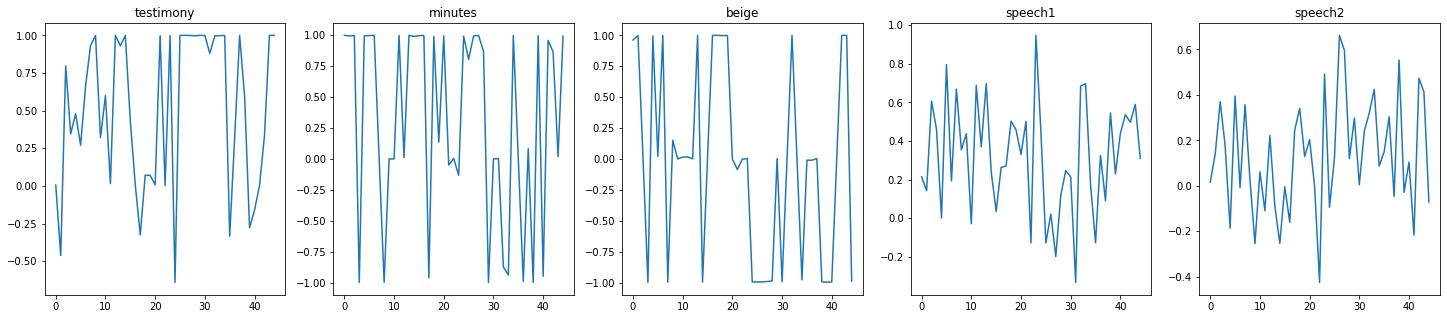

In [261]:
split_score_df = score_df
split_span = 1
split_list = []
fig = plt.figure(figsize=(25,5))
for idx in range(2,7): # column
    temp = []
    for i in range(len(split_score_df.iloc[:,idx])-split_span):
        temp.append(split_score_df.iloc[i:i+split_span,idx].mean())
    split_list.append(temp)
    fig = plt.subplot(1,5,idx-1)
    plt.plot(temp)
    plt.title(split_score_df.columns[idx])

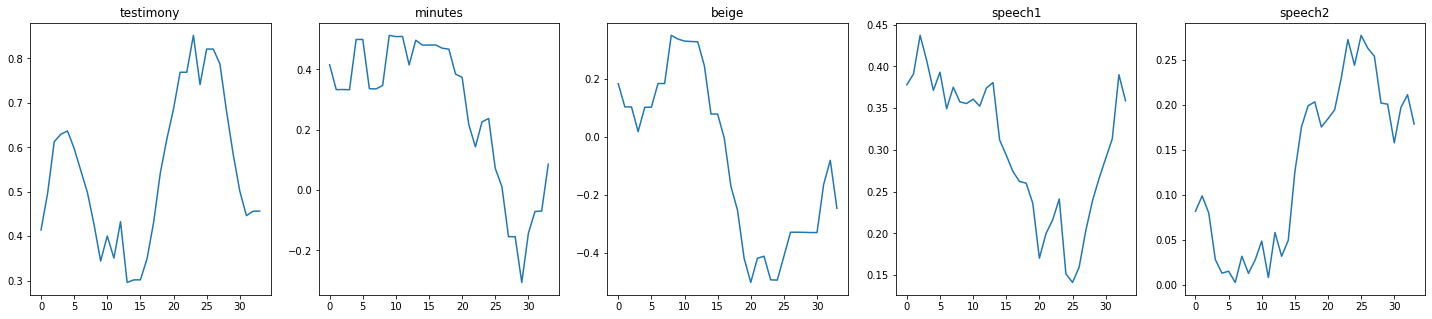

In [262]:
split_score_df = score_df
split_span = 12
split_list = []
fig = plt.figure(figsize=(25,5))
for idx in range(2,7): # column
    temp = []
    for i in range(len(split_score_df.iloc[:,idx])-split_span):
        temp.append(split_score_df.iloc[i:i+split_span,idx].mean())
    split_list.append(temp)
    fig = plt.subplot(1,5,idx-1)
    plt.plot(temp)
    plt.title(split_score_df.columns[idx])


In [263]:
sub_df = split_score_df.iloc[len(split_score_df) - len(split_list[0]):,7:]
sub_df.drop('label',axis=1,inplace=True)
category = ['testimony','minutes','beige','speech1','speech2']
for i in enumerate(category):
    sub_df[i[1]] = split_list[i[0]]
sub_df

,btr,inf,uem,itr,testimony,minutes,beige,speech1,speech2
12,0.000000,1.20730,6.933333,0.09,0.413945,0.415436,0.182462,0.378102,0.081640
13,0.000000,1.42991,6.666667,0.07,0.496732,0.333010,0.102322,0.391046,0.098750
14,0.000000,2.08034,6.200000,0.09,0.612757,0.333406,0.102390,0.437314,0.079772
15,0.000000,1.79097,6.066667,0.09,0.629570,0.332739,0.017149,0.406824,0.027800
16,0.000000,1.16401,5.700000,0.09,0.636789,0.499121,0.101091,0.371356,0.012806
17,0.000000,-0.11289,5.533333,0.11,0.597573,0.499408,0.101433,0.393149,0.014960
18,0.000000,0.03701,5.433333,0.12,0.547910,0.336111,0.183103,0.349353,0.002481
19,0.000000,0.15861,5.100000,0.13,0.498614,0.335378,0.182942,0.375152,0.031562
20,0.000000,0.40047,5.033333,0.12,0.426718,0.346688,0.349296,0.357589,0.012579
21,0.000000,0.99184,4.900000,0.34,0.344109,0.512906,0.336662,0.355556,0.027430


In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
quad = PolynomialFeatures(degree=1) # ,include_bias=False
input_idx = len(sub_df) - 1

features = ['btr','inf','uem']

X = sub_df.loc[:,features]
y = sub_df.loc[:,'itr']
X_quad = quad.fit_transform(X)
lr.fit(X_quad,y)
y_quad_fit = lr.predict(quad.fit_transform(X))

pred = []
for i in y_quad_fit:
    if i < 0:
        pred.append(0)
    else:
        pred.append(i)

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(pred,y)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(pred,y)) # 1에 가까울수록 강한 상관관계, 0일 수록 관계없음
print(1-(1-r2_score(pred,y))*(input_idx-1)/(input_idx-len(features)))

0.6087184608789764
-2.0717618807036424
-2.276546006083885


In [328]:
lr.coef_

array([ 0.        , -0.00058894, -0.10310478, -0.28885651])

In [329]:
lr.predict(quad.fit_transform(np.array(sub_df.loc[45,features]).reshape(1,-1)))


array([0.53468872])

In [330]:
temp_score_df = sub_df
temp_score_df['pred'] = pred
temp_score_df

,btr,inf,uem,itr,testimony,minutes,beige,speech1,speech2,pred
12,0.000000,1.20730,6.933333,0.09,0.413945,0.415436,0.182462,0.378102,0.081640,0.329113
13,0.000000,1.42991,6.666667,0.07,0.496732,0.333010,0.102322,0.391046,0.098750,0.383190
14,0.000000,2.08034,6.200000,0.09,0.612757,0.333406,0.102390,0.437314,0.079772,0.450927
15,0.000000,1.79097,6.066667,0.09,0.629570,0.332739,0.017149,0.406824,0.027800,0.519277
16,0.000000,1.16401,5.700000,0.09,0.636789,0.499121,0.101091,0.371356,0.012806,0.689833
17,0.000000,-0.11289,5.533333,0.11,0.597573,0.499408,0.101433,0.393149,0.014960,0.869630
18,0.000000,0.03701,5.433333,0.12,0.547910,0.336111,0.183103,0.349353,0.002481,0.883061
19,0.000000,0.15861,5.100000,0.13,0.498614,0.335378,0.182942,0.375152,0.031562,0.966809
20,0.000000,0.40047,5.033333,0.12,0.426718,0.346688,0.349296,0.357589,0.012579,0.961129
21,0.000000,0.99184,4.900000,0.34,0.344109,0.512906,0.336662,0.355556,0.027430,0.938670


rmse : 0.6087
r2 : -2.0718
prediction : 0.5347
true : 0.08


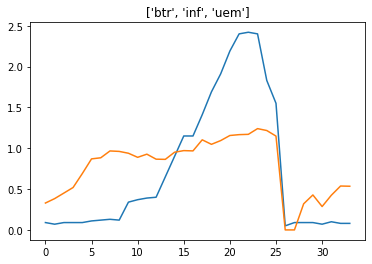

In [331]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp_score_df)),temp_score_df['itr'])
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title(f"{features}")

print(f'rmse : {round(rmse,4)}')
print(f'r2 : {round(r2_score(pred,y),4)}') # 1에 가까울수록 강한 상관관계, 0일 수록 관계없음
print(f'prediction : {round(lr.predict(quad.fit_transform(np.array(sub_df.loc[45,features]).reshape(1,-1)))[0],4)}')
print(f'true : {temp_score_df.iloc[-1,3]}')

Text(0.5, 1.0, 'question')

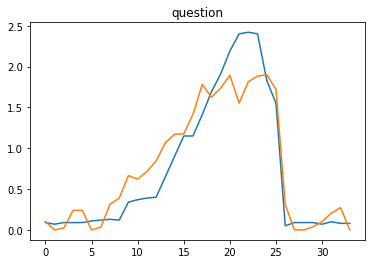

In [170]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp_score_df)),temp_score_df['itr'])
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title('question')

print(f'rmse : {round(rmse,4)}')
print(f'r2 : {round(r2_score(pred,y),4)}') # 1에 가까울수록 강한 상관관계, 0일 수록 관계없음
print(f'prediction : {round(lr.predict(quad.fit_transform(np.array(sub_df.loc[45,features]).reshape(1,-1)))[0],4)}')
print(f'true : {temp_score_df.iloc[-1,3]}')

Text(0.5, 1.0, 'no question')

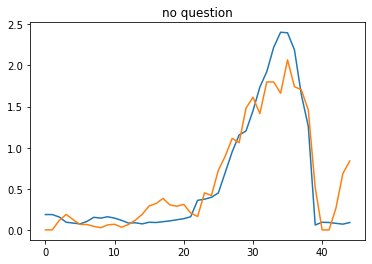

In [546]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp_score_df)),temp_score_df['FEDfunds'])
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title('no question')

print(f'rmse : {rmse}')
print(f'r2 : {r2_score(pred,y)}') 
